In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import torch
import torchvision
import torch.nn as nn
import torchvision.transforms as transforms

import os 
from shutil import copy2
from tqdm import tqdm_notebook as tqdm
import math

from PIL import Image
import matplotlib.pyplot as plt
# Any results you write to the current directory are saved as output.

In [2]:
root="../input/assignment2/training/frames/"
print(os.listdir(root))

['lec35', 'lec1', 'lec5', 'lec11', 'lec25', 'lec33', 'lec20', 'lec6', 'lec8', 'lec19', 'lec7', 'lec4', 'lec31', 'lec14', 'lec22', 'lec9', 'lec30', 'lec23', 'lec34', 'lec13', 'lec32', 'lec17', 'lec26', 'lec21', 'lec28', 'lec16', 'lec27', 'lec10', 'lec29', 'lec18', 'lec24', 'lec3', 'lec2', 'lec15', 'lec12']


In [3]:
#defining the first convolutional network without panaroma

class ConvNet1(nn.Module):
    def __init__(self):
        super(ConvNet1,self).__init__()
        
        self.layer1a=nn.Sequential(
                    nn.Conv2d(3,16,kernel_size=5,stride=2), #118,158,16
                    nn.BatchNorm2d(16),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2)) #59,79,16 
        self.layer2a=nn.Sequential(
                    nn.Conv2d(16,32,kernel_size=3,stride=2),  #29,39,32
                    nn.BatchNorm2d(32),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2)) #14,19,32
        self.layer3a=nn.Sequential(
                    nn.Conv2d(32,8,kernel_size=3,stride=2), #6,9,8
                    nn.BatchNorm2d(8),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=5,stride=2))#1,3,8
        
        self.layer1b=nn.Sequential(
                    nn.Conv2d(3,16,kernel_size=5,stride=3), #79,532,16
                    nn.BatchNorm2d(16),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=1)) #78,531,16
        self.layer2b=nn.Sequential(
                    nn.Conv2d(16,32,kernel_size=7,stride=4,padding=20), #28,142,32
                    nn.BatchNorm2d(32),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=2,stride=2)) #13,70,32
        self.layer3b=nn.Sequential(
                    nn.Conv2d(32,8,kernel_size=5,stride=4,padding=10), #8,22,8 
                    nn.BatchNorm2d(8),
                    nn.ReLU(),
                    nn.MaxPool2d(kernel_size=8,stride=5)) #1,3,8
        
        self.fc1=nn.Linear(1*3*16,1) 
        

    def forward(self, x): # x is a tensor

        _x=x[:,:,:,641:961]  #taking the middle image of the panaroma that we are considering 
        #print(_x.shape)
        out1=self.layer1a(_x)  
        #print(out1.shape)
        out1=self.layer2a(out1)
        #print(out1.shape)
        out1=self.layer3a(out1)
        #print(out1.shape)

        out2=self.layer1b(x)
        out2=self.layer2b(out2)
        out2=self.layer3b(out2)

        out=torch.cat((out1,out2),1)
        out = out.reshape(out.size(0), -1)
        out= self.fc1(out)

        y_out=nn.Sigmoid()(out)

        return y_out


In [4]:
root2="../input/annotated-data/annotated/"
print(os.listdir(root2))

['copied', 'copied_labels']


In [5]:
loc_xdata=root2+"copied/"
loc_ydata=root2+"copied_labels/"

In [6]:
os.listdir(loc_xdata)
os.listdir(loc_xdata+os.listdir(loc_xdata)[0])

['l49s00672.jpg',
 'l49s00674.jpg',
 'l49s00675.jpg',
 'l49s00671.jpg',
 'l49s00673.jpg']

In [7]:
#function to merge the images given the folder

def Merge_Image(images_path):
    im1=np.asarray(Image.open(images_path+os.listdir(images_path)[0]).resize((320, 240), Image.ANTIALIAS))
    for i in range(len(os.listdir(images_path))-1):
        im2=np.asarray(Image.open(images_path+os.listdir(images_path)[i+1]).resize((320, 240), Image.ANTIALIAS))
        #print("im2:"+str(im2.shape))
        im1=np.concatenate((im1,im2),axis=1)
        #print("im1:"+str(im1.shape))
    
    #print(im1.shape)
    return im1 #required panaroma view 
    
    

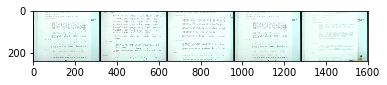

In [8]:
t=Merge_Image("../input/annotated-data/annotated/copied/1/")
t.shape
plt.imshow(t)

In [9]:
Li=os.listdir(loc_xdata)

In [ ]:
#loading the data
x_data=[]
y_data=np.array([])
for i in tqdm(range(len(os.listdir(loc_xdata)))):
        #function to return the merged images
        fname=os.listdir(loc_xdata)[i]
        path=loc_xdata+fname+"/"
        X_merged=Merge_Image(path)
        x_data.append(X_merged)
    
        asso_y=np.load(loc_ydata+fname+".npy")
        y_data=np.append(y_data,asso_y[2]) #taking the middle value out of all 

In [16]:
def Return_data(li,k):
    
    x_data=[]
    y_data=np.array([])
    #for i in tqdm(range(len(os.listdir(loc_xdata)))):
    for i in tqdm(range(500*k,500*(k+1))):
        #function to return the merged images
        fname=li[i]
        path=loc_xdata+fname+"/"
        X_merged=Merge_Image(path)
        x_data.append(X_merged)
    
        asso_y=np.load(loc_ydata+fname+".npy")
        y_data=np.append(y_data,asso_y[2]) #taking the middle value out of all
    
    x_data=np.array(x_data)
    x_data = np.rollaxis(x_data,3, 1)
    y_data=np.expand_dims(y_data,axis=1)
    print(x_data.shape)
    print(y_data.shape)
    return (x_data,y_data)

In [28]:
def Return_Testdata(li):
    
    x_data=[]
    y_data=np.array([])
    #for i in tqdm(range(len(os.listdir(loc_xdata)))):
    for i in tqdm(range(5000,5840)):
        #function to return the merged images
        fname=li[i]
        path=loc_xdata+fname+"/"
        X_merged=Merge_Image(path)
        x_data.append(X_merged)
    
        asso_y=np.load(loc_ydata+fname+".npy")
        y_data=np.append(y_data,asso_y[2]) #taking the middle value out of all
    
    x_data=np.array(x_data)
    x_data = np.rollaxis(x_data,3, 1)
    y_data=np.expand_dims(y_data,axis=1)
    print(x_data.shape)
    print(y_data.shape)
    return (x_data,y_data)

In [ ]:
x_data1 = np.asarray(x_data[0:1000])
x_data2 = np.asarray(x_data[1000:2000])
x_data3 = np.asarray(x_data[2000:3000])
x_data4 = np.asarray(x_data[3000:4000])
x_data5 = np.asarray(x_data[4000:5000])
x_data6 = np.asarray(x_data[5000:])

y_data1=np.expand_dims(y_data[0:1000],axis=1)
y_data2=np.expand_dims(y_data[1000:2000],axis=1)
y_data3=np.expand_dims(y_data[2000:3000],axis=1)
y_data4=np.expand_dims(y_data[3000:4000],axis=1)
y_data5=np.expand_dims(y_data[4000:5000],axis=1)
y_data6=np.expand_dims(y_data[5000:],axis=1)

In [ ]:
x_data1 = np.rollaxis(x_data1,3, 1)
x_data2 = np.rollaxis(x_data2,3, 1)
x_data3 = np.rollaxis(x_data3,3, 1)
x_data4 = np.rollaxis(x_data4,3, 1)
x_data5 = np.rollaxis(x_data5,3, 1)
x_data6 = np.rollaxis(x_data6,3, 1)

In [ ]:
data_d = {'data1':(x_data1,y_data1) ,'data2': (x_data2,y_data2),'data3':(x_data3,y_data3),'data4':(x_data4,y_data4),'data5':(x_data5,y_data5)
          }

In [ ]:
x_data1.shape
y_data1.shape

In [19]:
 #Device configuration
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

# Hyper parameters
num_epochs = 3
learning_rate = 0.05

In [20]:
model = ConvNet1().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

In [21]:
loss_list=[]
for epochs in tqdm(range(num_epochs)):
    i=0
    for key in tqdm(range(10)):
        i+=1
        inputs,labels = Return_data(Li,key)
        inputs= torch.from_numpy(inputs).to(device).float()
        labels= torch.from_numpy(labels).to(device)
        output = model.forward(inputs)
        loss = torch.nn.functional.binary_cross_entropy(output,labels.float())
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        loss_list.append(loss)
        
        #if (i+1) % 3 == 0:
        print ('Epoch [{}/{}], Step [{}/{}], Loss: {:.4f}' 
                .format(epochs+1, num_epochs, i+1, 11,  loss.item()))
        
    

(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [2/11], Loss: 0.7170


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [3/11], Loss: 0.2319


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [4/11], Loss: 0.1956


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [5/11], Loss: 0.1545


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [6/11], Loss: 0.2384


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [7/11], Loss: 0.2663


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [8/11], Loss: 0.1809


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [9/11], Loss: 0.2181


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [10/11], Loss: 0.1362


(500, 3, 240, 1600)
(500, 1)
Epoch [1/3], Step [11/11], Loss: 0.1883


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [2/11], Loss: 0.1740


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [3/11], Loss: 0.2031


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [4/11], Loss: 0.1606


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [5/11], Loss: 0.1231


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [6/11], Loss: 0.1595


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [7/11], Loss: 0.1679


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [8/11], Loss: 0.1406


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [9/11], Loss: 0.1578


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [10/11], Loss: 0.1269


(500, 3, 240, 1600)
(500, 1)
Epoch [2/3], Step [11/11], Loss: 0.1681


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [2/11], Loss: 0.1632


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [3/11], Loss: 0.1852


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [4/11], Loss: 0.1567


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [5/11], Loss: 0.1220


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [6/11], Loss: 0.1584


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [7/11], Loss: 0.1674


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [8/11], Loss: 0.1381


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [9/11], Loss: 0.1534


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [10/11], Loss: 0.1182


(500, 3, 240, 1600)
(500, 1)
Epoch [3/3], Step [11/11], Loss: 0.1660



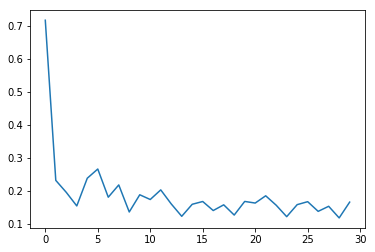

In [22]:
plt.plot(loss_list)

In [29]:
with torch.no_grad():
    model.eval()
    inputs,labels = Return_Testdata(Li)
    inputs= torch.from_numpy(inputs).to(device).float()
    labels= torch.from_numpy(labels).to(device)
    test_out = model.forward(inputs)
    
    test_out = test_out>0.5
    test_out = test_out.cpu().numpy()
    y_testset = labels.cpu().numpy()
    correct = test_out == y_testset
    tot=test_out.shape[0]
    num_corr = np.sum(correct)

print (num_corr/tot)

(840, 3, 240, 1600)
(840, 1)
0.9726190476190476


In [ ]:
from sklearn.metrics import f1_score
print(f1_score(test_out, y_testset,average='macro'))